In [224]:
import argparse
import time
import matplotlib.pyplot as plt
import numpy as np
import optparse
from dotenv import load_dotenv
import pandas as pd

from brainflow.board_shim import BoardShim, BrainFlowInputParams, BoardIds, BrainFlowPresets
from brainflow import ml_model
from brainflow.ml_model import *


In [5]:
load_dotenv()

True

In [234]:
BoardShim.enable_dev_board_logger()

board_id = 0
serial_port = os.getenv("SERIAL_PORT")

params = BrainFlowInputParams()
params.serial_port = serial_port
board = BoardShim(board_id, params)
board.prepare_session()
sampling_rate = board.get_sampling_rate(board_id)   # per second, presumably

In [235]:
id = ""
board.start_stream()
t = 2
time.sleep(t)
# data = board.get_current_board_data (256) # get latest 256 packages or less, doesnt remove them from internal buffer
data = board.get_board_data()  # get all data and remove it from internal buffer
board.stop_stream()
board.release_session()

In [228]:
pd.DataFrame([[1 / sampling_rate * i for i in range(len(data[1]))], *data[1:8, :]])

,0,1,2,3,4,5,6,7,8,9,...,2395,2396,2397,2398,2399,2400,2401,2402,2403,2404
0,0.000000,0.004000,0.008000,0.012000,0.016000,0.020000,0.024000,0.028000,0.032000,0.036000,...,9.580000,9.584000,9.588000,9.592000,9.596000,9.600000,9.604000,9.608000,9.612000,9.616000
1,-4529.871587,2327.107170,-8639.016287,3475.629208,-5363.926931,2785.519098,-8491.181849,3952.347213,-5553.380317,2362.355871,...,3792.912220,-9140.656488,3090.039264,-4594.758701,3198.847556,-9045.281594,3727.980402,-4728.042153,2623.670116,-8795.947885
2,-2129.808322,-1994.915544,-4006.594897,-5084.910105,-7694.364511,-4679.494164,-4087.307046,-4897.624838,-7581.242333,-4863.560780,...,-4277.475688,-3312.595584,-5428.299955,-8091.934990,-4496.947467,-3300.257421,-5170.472583,-8046.829170,-4706.807996,-3433.607928
3,1842.275481,3753.550798,4161.246617,3983.036158,171.996674,10223.956135,4061.513133,3443.129771,335.007946,10632.546023,...,10687.620722,4719.414380,2833.552996,-471.040663,12628.355638,4692.726397,969.395157,-350.050670,14216.514136,4527.055267
4,5953.007156,-5447.030717,11488.483726,-11893.609094,9605.885697,-12039.945965,11480.414746,-11595.190954,9630.114988,-12317.554631,...,-11265.614482,11707.329656,-12092.047881,9402.015436,-11621.878937,11765.243025,-11703.753376,9387.106822,-11977.226970,11751.139075
5,-1232.855169,1321.904519,-2594.366979,966.489430,-3896.937239,3805.116273,-2596.646857,737.540512,-3890.142308,3968.596932,...,3925.502768,-2865.091308,476.472137,-4077.181706,4477.032063,-2828.322688,-18.998983,-4099.734616,4900.754082,-2822.310069
6,7342.056315,3009.327115,-14394.031691,4570.216485,24359.869881,5464.487429,-7805.922068,4740.447371,17385.253893,5291.440224,...,5996.436595,-24965.490397,4142.672317,34520.257654,5885.035501,-18005.850077,4304.163671,26963.110502,5722.270098,-9480.850039
7,-419.050505,6111.928059,-317.908861,6709.099616,-4343.480390,19609.833611,-427.901796,5153.619367,-4197.970533,20880.306766,...,18028.894726,230.468837,7697.404349,-5016.781988,20536.201660,223.226872,5310.774483,-4948.139781,22582.481513,57.712204


120.0 120


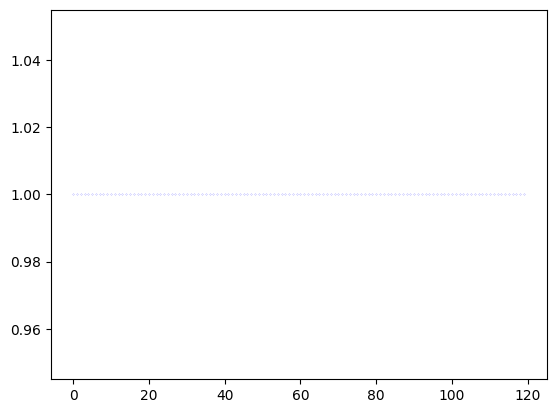

In [232]:
model = MLModel(BrainFlowModelParams(1, 0))
t_steps_per_pred = 20
num_preds = data.shape[1] // t_steps_per_pred
preds = []
for i in range(num_preds):
    model.prepare()
    prediction = model.predict(data[1:9, i * t_steps_per_pred : (i+1) * t_steps_per_pred])
    model.release()
    preds.append(prediction[0])
print(np.sum(preds), num_preds)
plt.plot(np.where(np.array(preds) == 1)[0], [1] * int(sum(preds)), 'bo', markersize=0.1)

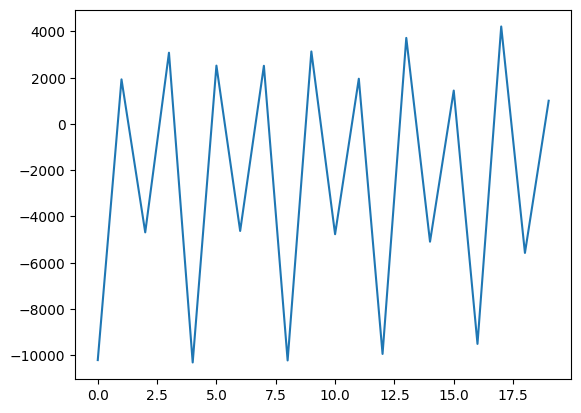

In [201]:
plt.plot(data[1, 20:40])

In [202]:
np.fft.fft(data[1])

array([-5.59875496e+06-1.81898940e-11j, -1.62204066e+04+1.73388609e+04j,
        5.61708093e+03+1.05095477e+03j, ...,
        1.70766642e+03-4.53920570e+02j,  5.61708093e+03-1.05095477e+03j,
       -1.62204066e+04-1.73388609e+04j])

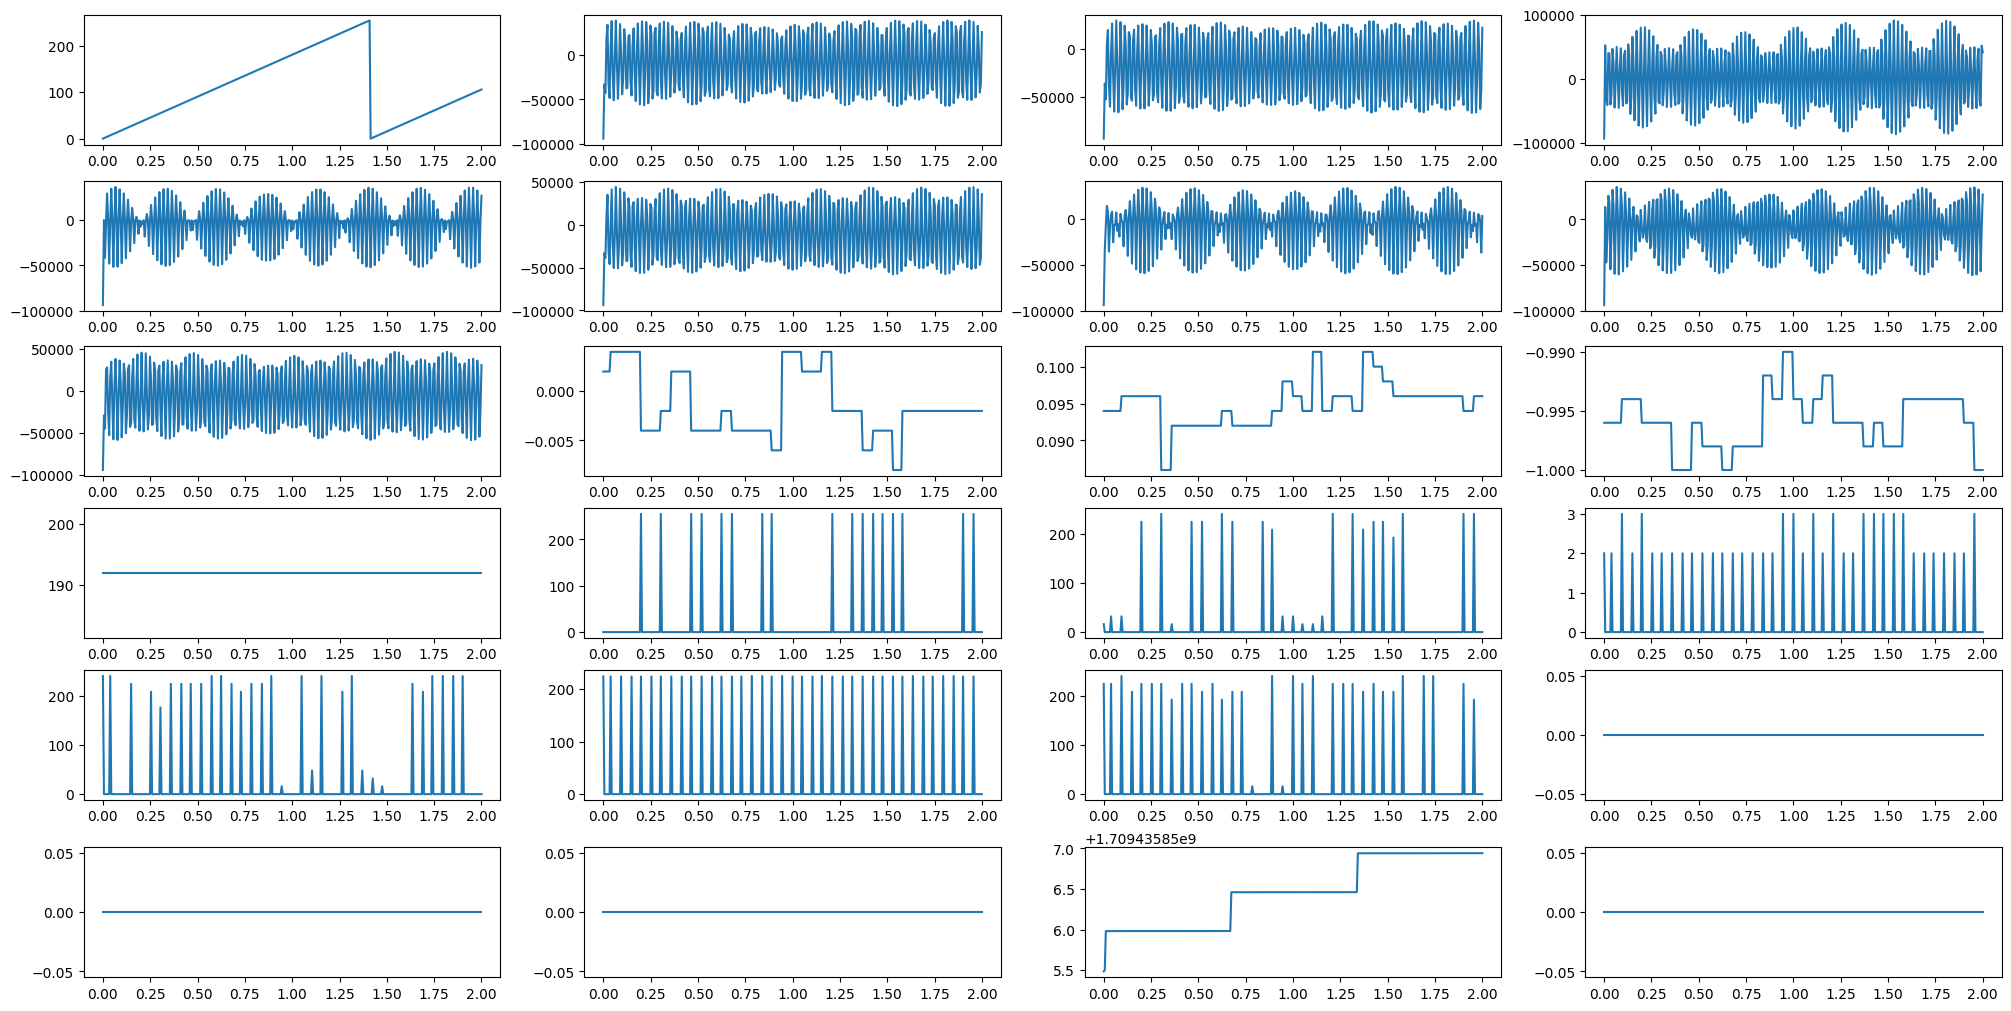

In [236]:
fig, axs = plt.subplots(6, 4, constrained_layout=True, figsize=(20, 10))
for i in range(6):
    for j in range(4):
        d = data[4 * i + j]
        axs[i][j].plot(np.linspace(0, t, len(d)), d)

In [11]:
board.get_eeg_channels(board_id)

[1, 2, 3, 4, 5, 6, 7, 8]